# House Price Prediction

In [23]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import pandas as pd
import numpy as np
from utils import *

In [24]:
data = fetch_california_housing(as_frame=True)

# 1. Data Exploration

In [25]:
print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [26]:
print(data.DESCR)
feature_names = data.feature_names
target_name = data.target_names
X, y = data.data, data.target

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [27]:
data.frame.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
10288,6.7837,19.0,6.328571,0.967857,1787.0,3.191071,33.89,-117.84,2.643
9908,2.5035,20.0,4.484783,1.056522,1045.0,2.271739,38.32,-122.30,1.532
8083,2.4286,34.0,3.772849,1.032258,2217.0,2.979839,33.82,-118.20,2.048
5153,1.2969,44.0,4.398256,1.072674,1088.0,3.162791,33.95,-118.26,0.944
16499,3.8534,32.0,5.599010,1.029703,1156.0,2.861386,37.77,-120.96,1.576


In [28]:
### statistical data description
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [29]:
X.isna().sum().sum()

0

# 2. Simplest model

### Separation & Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training model

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### Results

In [32]:
pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

print_results(y_train, pred_train, X_train.shape[0], X_train.shape[1])
print_results(y_test, pred_test, X_test.shape[0], X_test.shape[1])

MSE : 0.523
R2 : 0.609
Adjusted R2 : 0.609

MSE : 0.531
R2 : 0.596
Adjusted R2 : 0.595



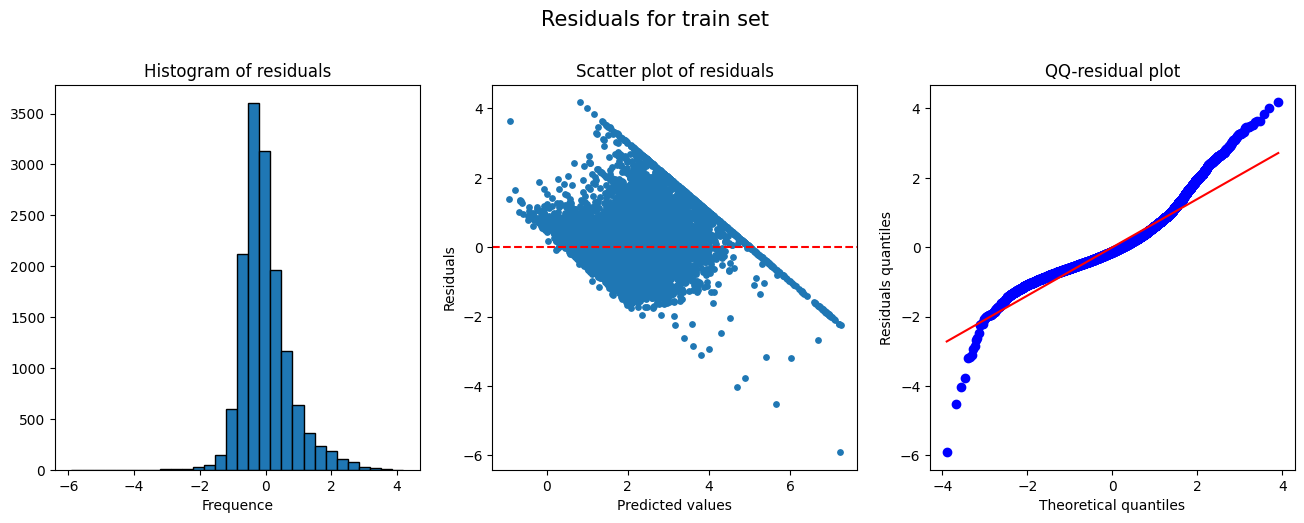

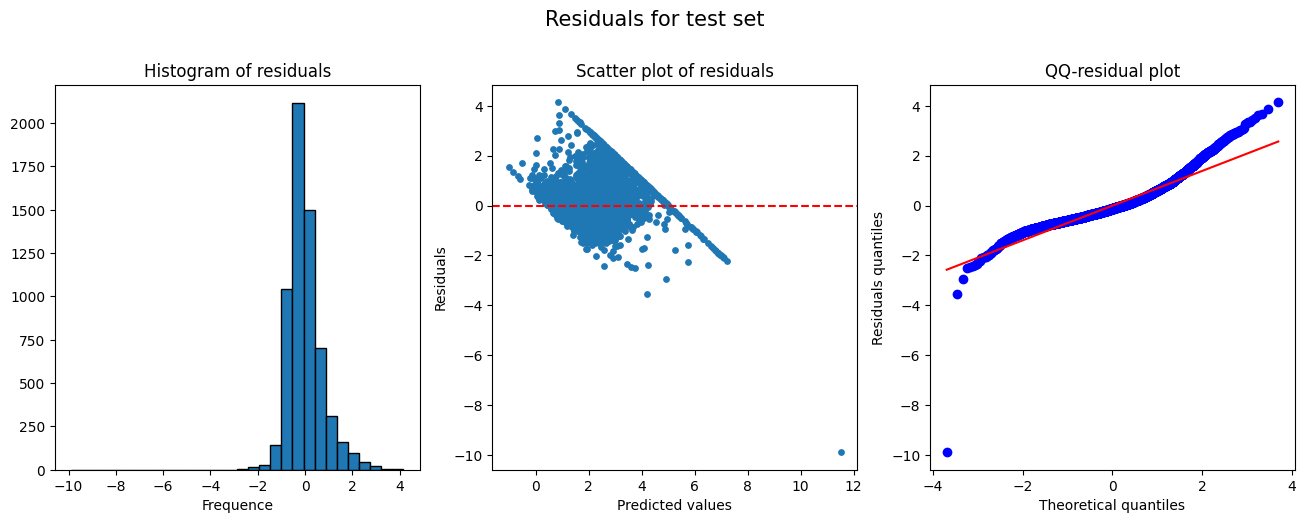

In [33]:
plot_residuals(y_train, pred_train, "Residuals for train set")
plot_residuals(y_test, pred_test, "Residuals for test set")

**1. Histogram of Residuals (left):**
The distribution of residuals appears to follow a normal shape with a mean around zero, which is desirable. This suggests that the model does not have significant bias and that errors are generally centered around zero. However, there are a few extreme values, which could indicate the presence of some outliers or variance not accounted for by the model.

**2. Scatter Plot of Residuals vs. Predicted Values (center):**
This plot shows that the residuals are not perfectly random; there is a diagonal structure, suggesting heteroscedasticity (residuals increase or decrease with predicted values). This might indicate that the model has difficulty capturing certain trends or variances in the data.

**3. QQ Plot of Residuals (right):**
This normality plot of residuals shows a deviation from the normal line, especially at the tails. This indicates that the residuals do not perfectly follow a normal distribution, which could impact the model's performance and interpretation, particularly if the analysis relies on the normality assumption.

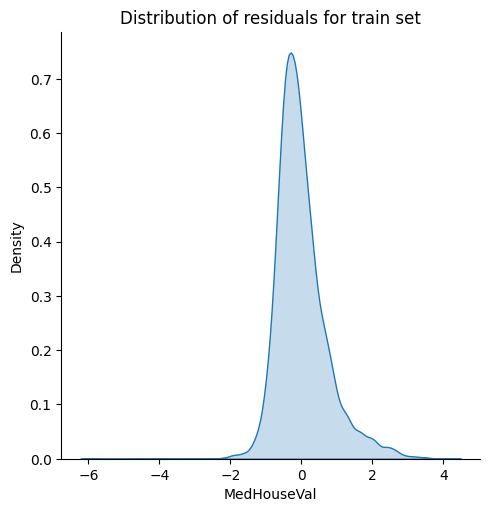

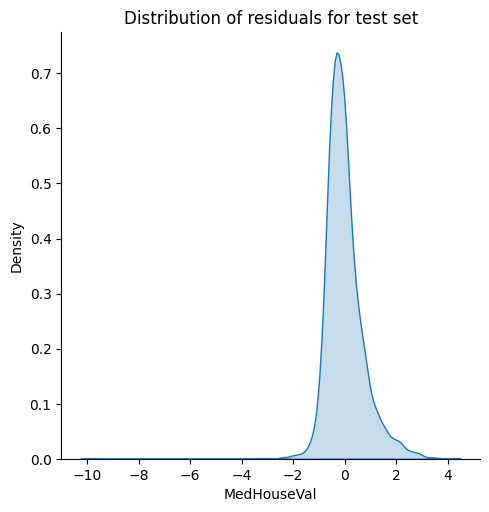

In [34]:
resid_train = y_train - pred_train
resid_test = y_test - pred_test
sns.displot(resid_train, kind="kde", fill=True)
plt.title("Distribution of residuals for train set")
plt.show()

sns.displot(resid_test, kind="kde", fill=True)
plt.title("Distribution of residuals for test set")
plt.show()

### With Statsmodels

In [35]:
import statsmodels.formula.api as smf

X_train = pd.DataFrame(X_train, columns=feature_names)
X_train['MedHouseVal'] = np.array(y_train)
model = smf.ols(formula=f"MedHouseVal ~ {'+'.join(feature_names)}", data=X_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2815.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:06:33   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14439   BIC:                         3.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0692      0.006    343.700      0.000       2.057       2.081
MedInc         0.8492      0.010     89.283      0.000       0.831       0.868
HouseAge       0.1221      0.007     18.240      0.000       0.109       0.135
AveRooms      -0.2996      0.017    -17.362      0.000      -0.333      -0.266
AveBedrms      0.3484      0.016     21.978      0.000       0.317       0.379
Population    -0.0009      0.006     -0.138      0.890      -0.013       0.012
AveOccup      -0.0417      0.006     -6.889      0.000      -0.054      -0.030
Latitude      -0.8939      0.018    -49.265      0.000      -0.929      -0.858
Longitude     -0.8686      0.018    -48.757      0.000      -0.904      -0.834
==============================================================================
Omnibus:                     2973.049   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8566.499
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       6.091   Cond. No.                         6.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model is statistically significant, explaining approximately 60.9% of the variance in median house value (MedHouseVal).   

- Most predictors have significant effects on house value, with expected relationships. **However, population size (Population) is not significant.**  

- The residuals are not normally distributed (significant Omnibus and Jarque-Bera tests), with skewness and kurtosis suggesting asymmetry and heavier tails.  

- The Durbin-Watson statistic (1.964) suggests no significant autocorrelation, which supports model assumptions.  

- Next Steps to Improve the Model:  
To enhance the model's performance, we will consider first dealing with outliers, and then using non-linear methods to address heteroscedasticity and non-normal residuals.

#### Évaluation d'un modèle sans la variable `Population`

In [36]:
new_data = data.frame.drop(['Population'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(['MedHouseVal'], axis=1), new_data['MedHouseVal'], test_size=0.3, random_state=42)

scaler_ = StandardScaler()

X_train = scaler_.fit_transform(X_train)
X_test = scaler_.transform(X_test)

feature_names_ = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']
X_train = pd.DataFrame(X_train, columns=feature_names_)
X_train['MedHouseVal'] = np.array(y_train)
model = smf.ols(formula=f"MedHouseVal ~ {'+'.join(feature_names_)}", data=X_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3218.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:06:44   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14440   BIC:                         3.172e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0692      0.006    343.712      0.000       2.057       2.081
MedInc         0.8493      0.010     89.320      0.000       0.831       0.868
HouseAge       0.1224      0.006     19.282      0.000       0.110       0.135
AveRooms      -0.2995      0.017    -17.366      0.000      -0.333      -0.266
AveBedrms      0.3484      0.016     21.979      0.000       0.317       0.379
AveOccup      -0.0418      0.006     -6.928      0.000      -0.054      -0.030
Latitude      -0.8936      0.018    -49.514      0.000      -0.929      -0.858
Longitude     -0.8684      0.018    -48.890      0.000      -0.903      -0.834
==============================================================================
Omnibus:                     2974.714   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8572.716
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.092   Cond. No.                         6.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We actually realize that this variable is not significant

# 3. Removing Outliers

--------MedInc--------
Lower Whisker: 0.4999
Upper Whisker: 8.0113



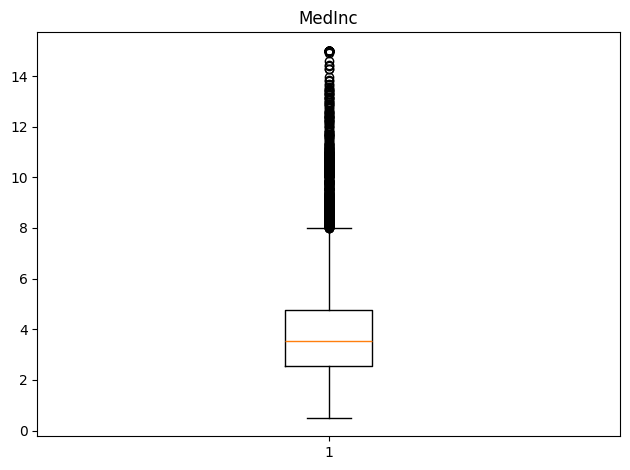

--------HouseAge--------
Lower Whisker: 1.0
Upper Whisker: 52.0



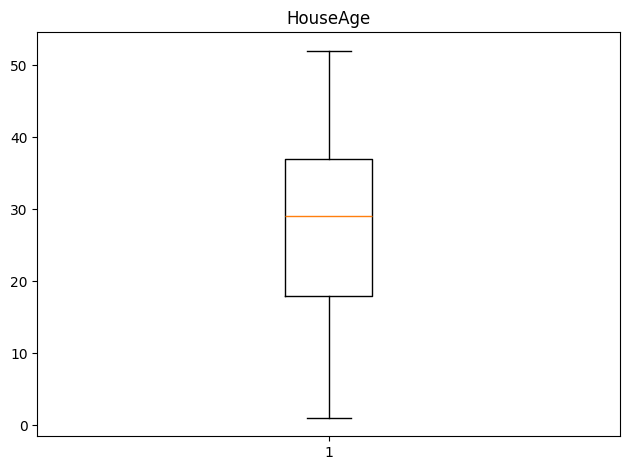

--------AveRooms--------
Lower Whisker: 2.0327380952380953
Upper Whisker: 8.469738030713641



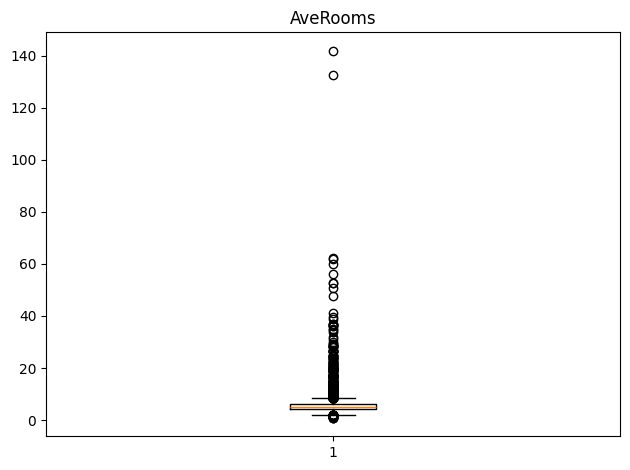

--------AveBedrms--------
Lower Whisker: 0.8660130718954249
Upper Whisker: 1.2395209580838322



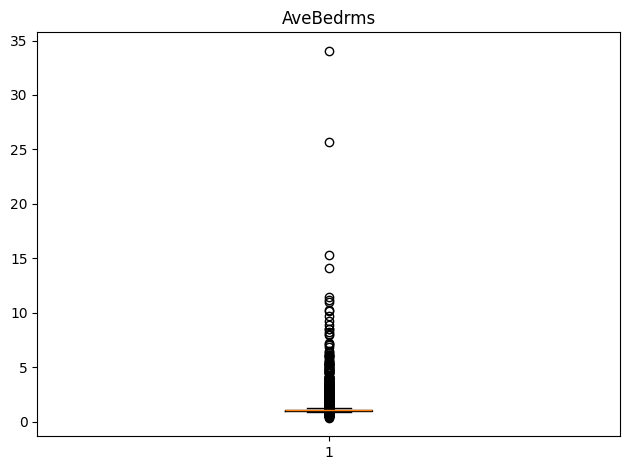

--------AveOccup--------
Lower Whisker: 1.1612903225806452
Upper Whisker: 4.5607476635514015



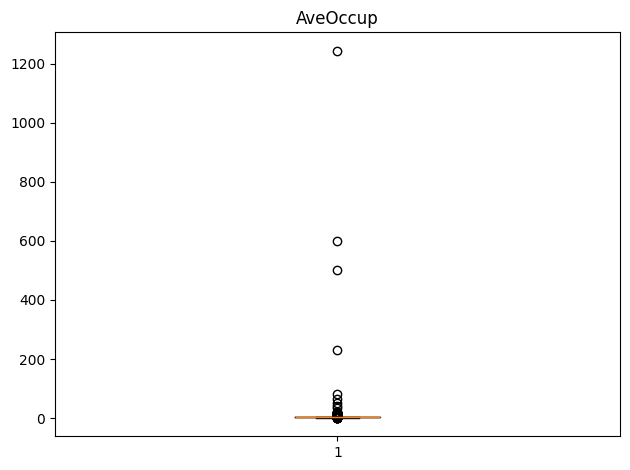

--------Latitude--------
Lower Whisker: 32.54
Upper Whisker: 41.95



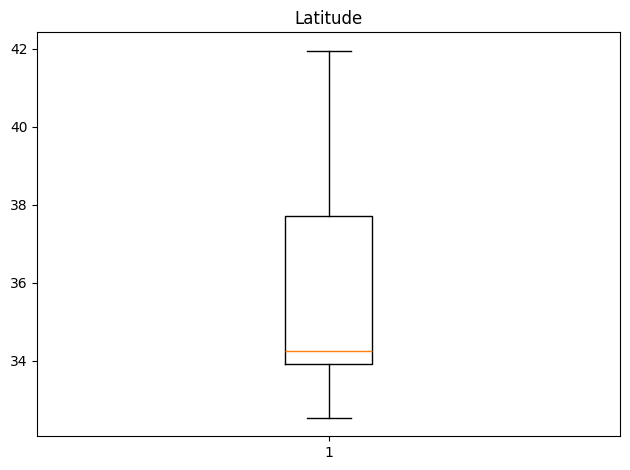

--------Longitude--------
Lower Whisker: -124.35
Upper Whisker: -114.31



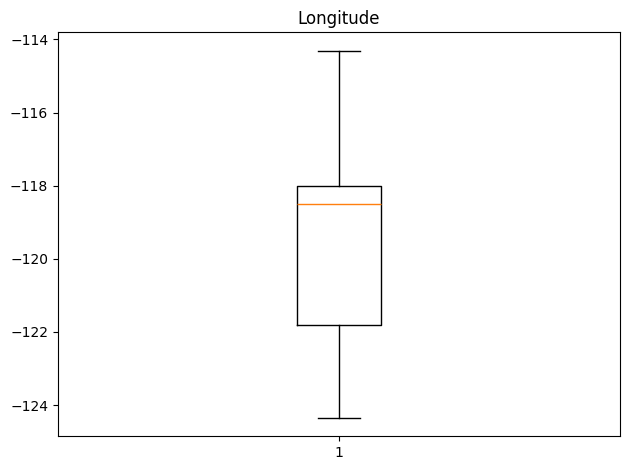

In [39]:
all_whiskers = {}

for feature in feature_names_:
    all_whiskers[feature] = plot_boxplot(X, feature_name=feature)

In [40]:
all_whiskers

{'MedInc': (0.4999, 8.0113),
 'HouseAge': (1.0, 52.0),
 'AveRooms': (2.0327380952380953, 8.469738030713641),
 'AveBedrms': (0.8660130718954249, 1.2395209580838322),
 'AveOccup': (1.1612903225806452, 4.5607476635514015),
 'Latitude': (32.54, 41.95),
 'Longitude': (-124.35, -114.31)}

In [41]:
# removing outliers
out_feat = ['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup']
X = data.frame

df = X[
    (X[out_feat[0]] >= all_whiskers[out_feat[0]][0]) & (X[out_feat[0]] <= all_whiskers[out_feat[0]][1]) &
    (X[out_feat[1]] >= all_whiskers[out_feat[1]][0]) & (X[out_feat[1]] <= all_whiskers[out_feat[1]][1]) &
    (X[out_feat[2]] >= all_whiskers[out_feat[2]][0]) & (X[out_feat[2]] <= all_whiskers[out_feat[2]][1]) &
    (X[out_feat[3]] >= all_whiskers[out_feat[3]][0]) & (X[out_feat[3]] <= all_whiskers[out_feat[3]][1])
    ].reset_index(drop=True)

df.to_csv('../data/df.csv', index=False)

--------MedInc--------
Lower Whisker: 0.536
Upper Whisker: 7.8031



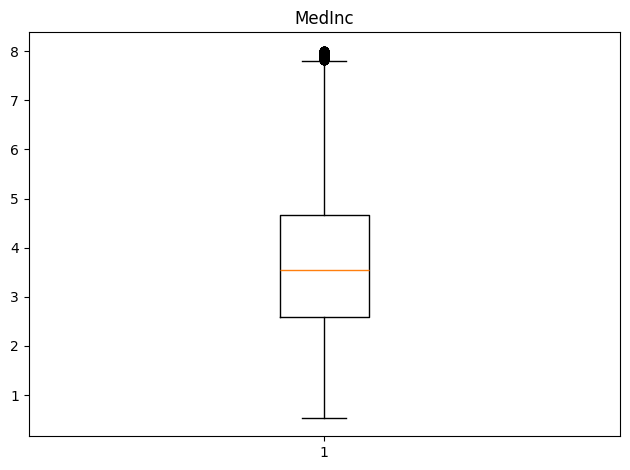

--------HouseAge--------
Lower Whisker: 1.0
Upper Whisker: 52.0



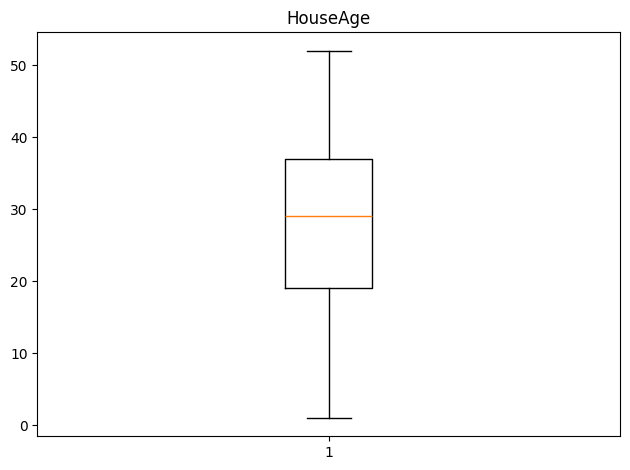

--------AveRooms--------
Lower Whisker: 2.2468694096601074
Upper Whisker: 8.056689342403628



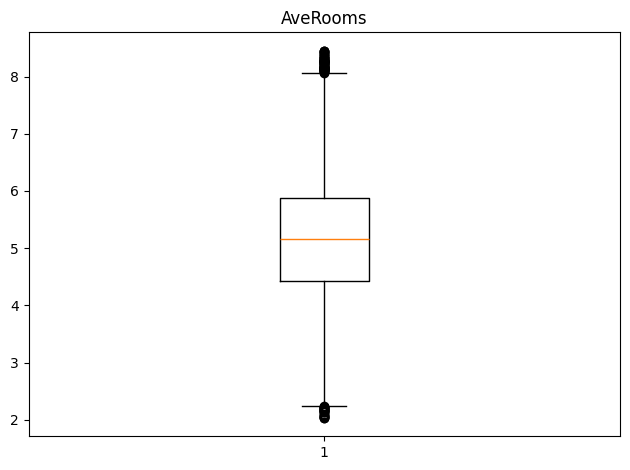

--------AveBedrms--------
Lower Whisker: 0.8786407766990292
Upper Whisker: 1.2159090909090908



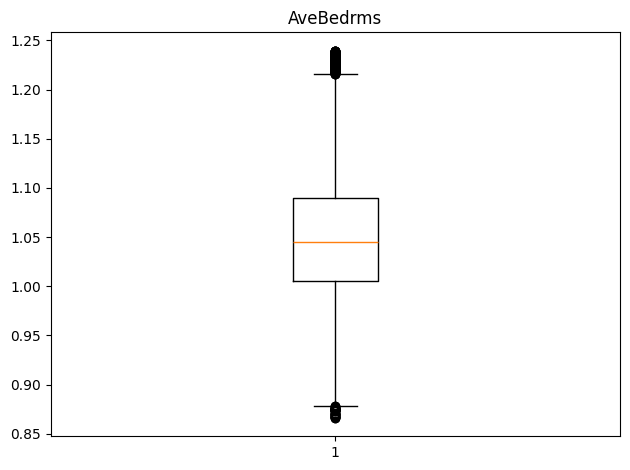

--------AveOccup--------
Lower Whisker: 1.2158730158730158
Upper Whisker: 4.466298342541436



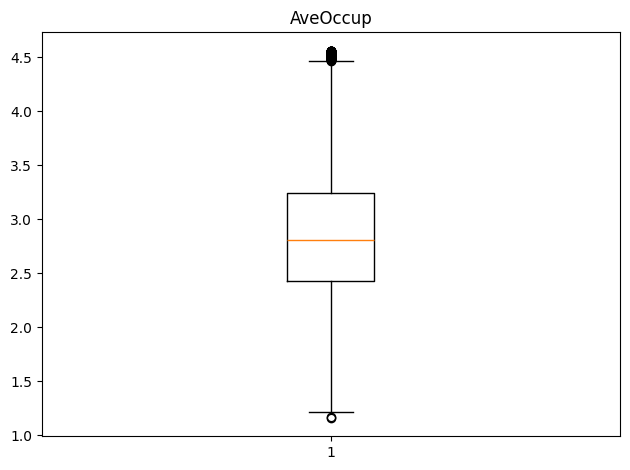

In [42]:
for feature in feature_names_[:-2]:
    plot_boxplot(df, feature_name=feature, return_whiskers=False)

### Separating & scaling

In [43]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

### X_api for tests with API
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=43)
X_train2, X_api, y_train2, y_api = train_test_split(X_train2, y_train2, test_size=0.001, random_state=43)

scaler2 = StandardScaler()

X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [44]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

### Results

In [45]:
pred_test2 = lr2.predict(X_test2)
pred_train2 = lr2.predict(X_train2)

print_results(y_train2, pred_train2, X_train2.shape[0], X_train2.shape[1])
print_results(y_test2, pred_test2, X_test2.shape[0], X_test2.shape[1])

MSE : 0.408
R2 : 0.638
Adjusted R2 : 0.638

MSE : 0.393
R2 : 0.646
Adjusted R2 : 0.646



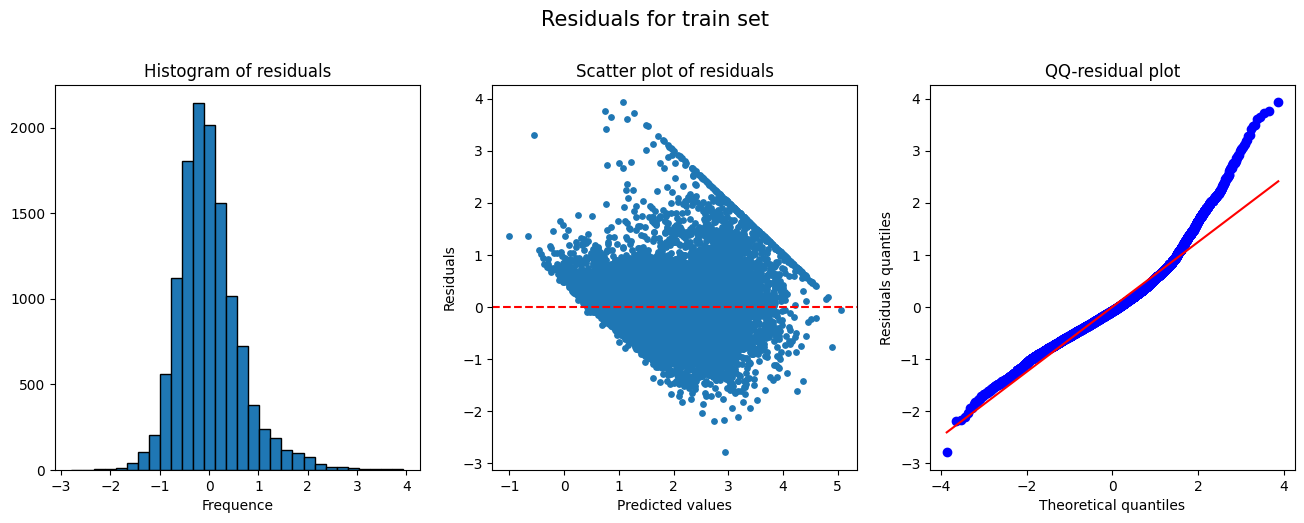

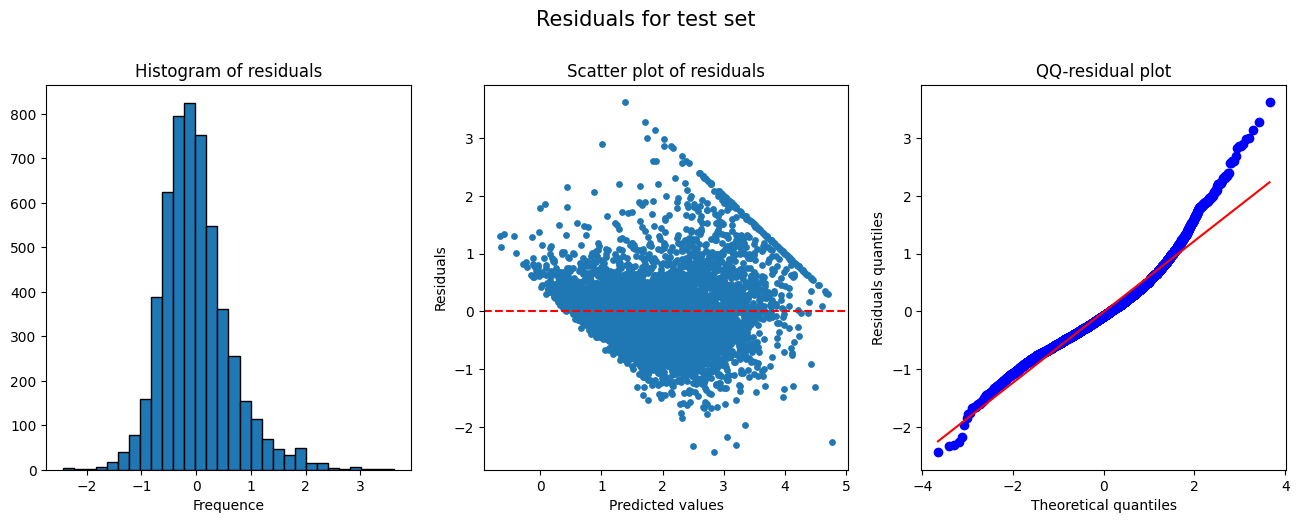

In [46]:
plot_residuals(y_train2, pred_train2, "Residuals for train set")
plot_residuals(y_test2, pred_test2, "Residuals for test set")

### Prediction

In [47]:
pd.DataFrame({'y_test2': y_test2, 'pred_test2': pred_test2}).head()

,y_test2,pred_test2
5864,2.240,2.338705
15573,2.739,2.539881
7714,2.917,2.620861
2755,0.680,0.628046
14363,2.082,2.649915


In [48]:
X_api = X_api.reset_index(drop=True)
y_api = y_api.reset_index(drop=True)
data_api = pd.concat([X_api, y_api], axis=1)
data_api.to_csv('../data/data_api.csv', index=False)

### Saving the best linear regression model

In [ ]:
import pickle

pickle.dump(lr2, open('../data/regmodel.pkl', 'wb'))
pickle.dump(scaler2, open('../data/stdscaler.pkl', 'wb'))

# 4. Non-linear algorithms: Gradient Boosting algorithms & Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [15]:
df = pd.read_csv('../data/df.csv')
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [16]:
# Dataset division into training=0.6, validation=0.2 and testing=0.2
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [17]:
def objective(trial):
    # Hyperparameters to be tuner
    """
    Hyperparameter optimization function for Optuna.

    Parameters
    ----------
    trial : optuna.trial.Trial
        The Optuna trial object.

    Returns
    -------
    float
        The mean squared error of the model on the validation set.
    """
    model_name = trial.suggest_categorical('model', ['RandomForest', 'XGBoost', 'CatBoost', 'LightGBM'])
    
    if model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 5, 30)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 3, 15)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    elif model_name == 'CatBoost':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        depth = trial.suggest_int('depth', 3, 10)
        model = CatBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, depth=depth, verbose=0, random_state=42)
    elif model_name == 'LightGBM':
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', -1, 30)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        num_leaves = trial.suggest_int('num_leaves', 31, 256)
        model = lgb.LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, num_leaves=num_leaves, random_state=42)
    
    # Creation of a pipeline with the scaler and the model
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)
    mse = pow(root_mean_squared_error(y_val, preds),2)
    return mse

In [18]:

study = optuna.create_study(direction='minimize', study_name='First Hyperparams tuning')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Best hyperparameters
print('\n\n\nMeilleur essai:')
trial = study.best_trial
print(f'Valeur: {trial.value}')
print('Paramètres:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2024-11-04 04:43:05,250] A new study created in memory with name: First Hyperparams tuning


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-11-04 04:43:06,545] Trial 0 finished with value: 0.24295092691100661 and parameters: {'model': 'XGBoost', 'n_estimators': 702, 'max_depth': 11, 'learning_rate': 0.23748949479219245}. Best is trial 0 with value: 0.24295092691100661.
[I 2024-11-04 04:43:09,023] Trial 1 finished with value: 0.26263473498080114 and parameters: {'model': 'XGBoost', 'n_estimators': 167, 'max_depth': 15, 'learning_rate': 0.16292738162016765}. Best is trial 0 with value: 0.24295092691100661.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 10722, number of used features: 8
[LightGBM] [Info] Start training from score 2.009836
[I 2024-11-04 04:43:09,909] Trial 2 finished with value: 0.20979235760608306 and parameters: {'model': 'LightGBM', 'n_estimators': 700, 'max_depth': 23, 'learning_rate': 0.1981832

In [19]:
# Retraining of the best model on the training set + validation
best_model_name = trial.params['model']

if best_model_name == 'RandomForest':
    best_model = RandomForestRegressor(n_estimators=trial.params['n_estimators'],
                                       max_depth=trial.params['max_depth'],
                                       random_state=42)
elif best_model_name == 'XGBoost':
    best_model = xgb.XGBRegressor(n_estimators=trial.params['n_estimators'],
                                  max_depth=trial.params['max_depth'],
                                  learning_rate=trial.params['learning_rate'],
                                  random_state=42)
elif best_model_name == 'CatBoost':
    best_model = CatBoostRegressor(n_estimators=trial.params['n_estimators'],
                                   learning_rate=trial.params['learning_rate'],
                                   depth=trial.params['depth'],
                                   verbose=0,
                                   random_state=42)
elif best_model_name == 'LightGBM':
    best_model = lgb.LGBMRegressor(n_estimators=trial.params['n_estimators'],
                                   max_depth=trial.params['max_depth'],
                                   learning_rate=trial.params['learning_rate'],
                                   num_leaves=trial.params['num_leaves'],
                                   random_state=42)
    

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

best_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                ('model', best_model)])

best_pipeline.fit(X_combined, y_combined)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x0000021367612990>)])

In [20]:
import pickle
pickle.dump(best_pipeline, open('../data/CatBoostRegressor.pkl', 'wb'))

In [21]:
pred_test = best_pipeline.predict(X_test)
pred_train = best_pipeline.predict(X_combined)

print_results(y_combined, pred_train, X_train.shape[0], X_train.shape[1])
print_results(y_test, pred_test, X_test.shape[0], X_test.shape[1])

MSE : 0.062
R2 : 0.944
Adjusted R2 : 0.944

MSE : 0.167
R2 : 0.855
Adjusted R2 : 0.854



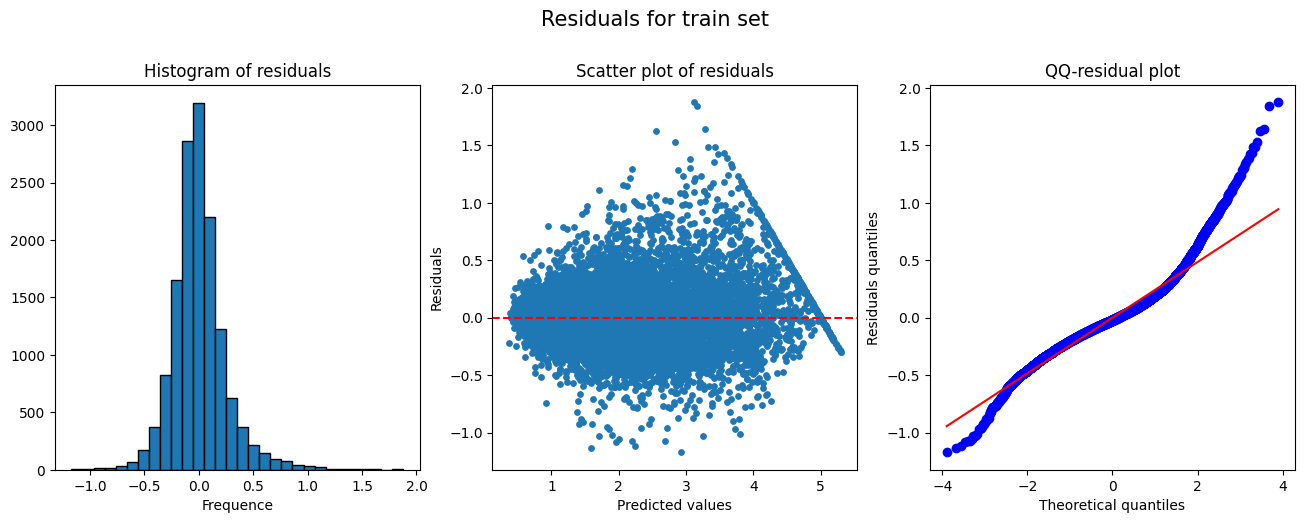

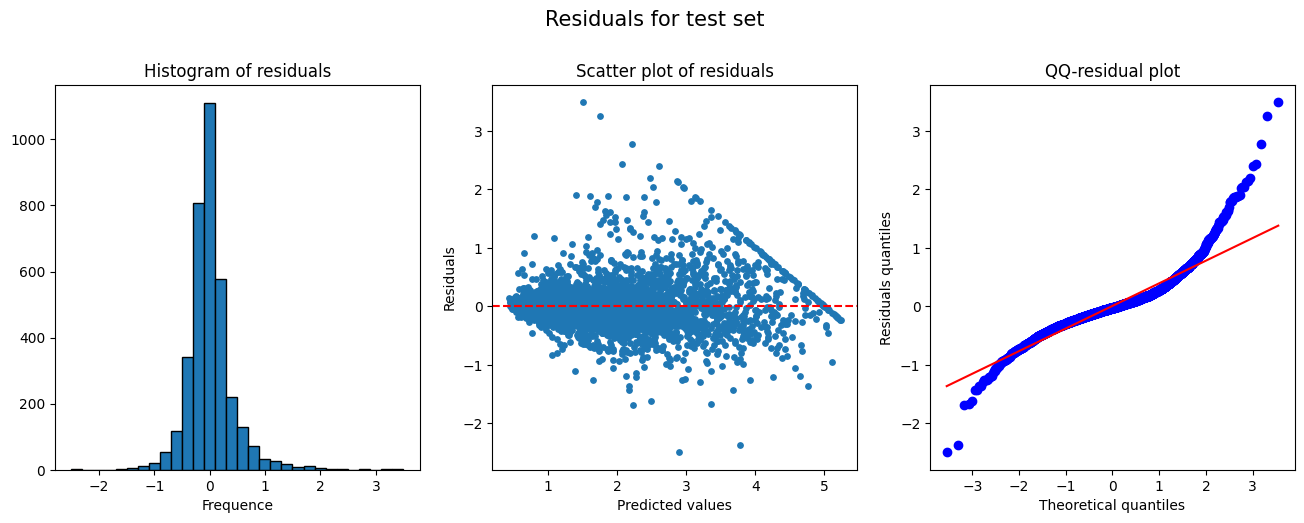

In [22]:
plot_residuals(y_combined, pred_train, "Residuals for train set")
plot_residuals(y_test, pred_test, "Residuals for test set")

- **Residual Distribution:** The residuals are approximately normally distributed around zero, indicating no major bias in predictions. However, slight asymmetry and outliers suggest some data points are not fully captured by the model.   

- **Heteroscedasticity:** The cone shape in the residuals vs. predicted values plot suggests heteroscedasticity, meaning the variance of errors increases with the predicted values. This may affect model robustness.   

- **Normality of Residuals:** The QQ plot shows deviations from normality, particularly in the tails, indicating that the model has more extreme errors than expected under normal assumptions.   

- To improve the model, we could apply feature transformations to reduce heteroscedasticity